In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
df= pd.read_csv("C:\\Users\\Administrator\\Desktop\\pakwheels_pakistan_automobile_dataset.csv")

In [63]:
df.shape

(48189, 16)

In [64]:
df.describe()

,price,model,mileage,engine_capacity,vehicle_age
count,4.818900e+04,48189.000000,48189.000000,48189.000000,48189.000000
mean,4.300611e+06,2013.690074,90444.885327,1417.805038,10.309926
std,6.285592e+06,7.511492,85300.588856,715.792743,7.511492
min,0.000000e+00,1990.000000,1.000000,100.000000,0.000000
25%,1.689999e+06,2008.000000,36000.000000,1000.000000,4.000000
50%,3.000000e+06,2016.000000,79192.000000,1300.000000,8.000000
75%,4.750000e+06,2020.000000,122456.000000,1600.000000,16.000000
max,1.750000e+08,2024.000000,1000000.000000,15000.000000,34.000000


In [65]:
df.columns

Index(['title', 'price', 'city', 'model', 'mileage', 'fuel_type',
       'transmission', 'registered', 'color', 'assembly', 'engine_capacity',
       'post_date', 'price_category', 'mileage_category', 'post_day_of_week',
       'vehicle_age'],
      dtype='object')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48189 entries, 0 to 48188
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             48189 non-null  object
 1   price             48189 non-null  int64 
 2   city              48189 non-null  object
 3   model             48189 non-null  int64 
 4   mileage           48189 non-null  int64 
 5   fuel_type         48189 non-null  object
 6   transmission      48189 non-null  object
 7   registered        48189 non-null  object
 8   color             48189 non-null  object
 9   assembly          48189 non-null  object
 10  engine_capacity   48189 non-null  int64 
 11  post_date         48189 non-null  object
 12  price_category    48189 non-null  object
 13  mileage_category  48189 non-null  object
 14  post_day_of_week  48189 non-null  object
 15  vehicle_age       48189 non-null  int64 
dtypes: int64(5), object(11)
memory usage: 5.9+ MB


In [67]:
df.isnull().sum()

title               0
price               0
city                0
model               0
mileage             0
fuel_type           0
transmission        0
registered          0
color               0
assembly            0
engine_capacity     0
post_date           0
price_category      0
mileage_category    0
post_day_of_week    0
vehicle_age         0
dtype: int64

In [68]:
df.isna().sum()

title               0
price               0
city                0
model               0
mileage             0
fuel_type           0
transmission        0
registered          0
color               0
assembly            0
engine_capacity     0
post_date           0
price_category      0
mileage_category    0
post_day_of_week    0
vehicle_age         0
dtype: int64

In [69]:
df.duplicated()
df = df.drop_duplicates()

In [70]:
df['price'] = pd.to_numeric(df['price'],  errors='coerce')
df['model'] = pd.to_numeric(df['model'],  errors='coerce')

In [71]:
df['title'] = df['title'].str.lower().str.strip()

In [72]:
df['extracted_year'] = df['title'].str.extract(r'(\d{4})')
df['extracted_year'] = pd.to_numeric(df['extracted_year'], errors =  'coerce')

In [73]:
zero_price_na_rows = df[(df['price'] == 0) | (df['price'].isna())] 
zero_price_na_rows.head(3)

,title,price,city,model,mileage,fuel_type,transmission,registered,color,assembly,engine_capacity,post_date,price_category,mileage_category,post_day_of_week,vehicle_age,extracted_year
2,suzuki vitara glx 1.6 2017,0,Karachi,2017,67000,Petrol,Automatic,Karachi,Grey,Imported,1600,5/4/2024,Low,Medium,Saturday,7,2017.0
138,mercedes benz eqs 2023,0,Lahore,2023,10,Not Available,Automatic,Un-Registered,White,Imported,1300,5/3/2024,Low,Low,Friday,1,2023.0
140,toyota c-hr g-led 2019,0,Lahore,2019,48000,Hybrid,Automatic,Un-Registered,White Pearl,Imported,1800,5/3/2024,Low,Low,Friday,5,2019.0


In [74]:
df['price'] = df['price'].replace(0, pd.NA)
df['price'] = df.groupby('model')['price'].transform(lambda x:x.fillna(x.median()))

In [75]:
print(df['price'].isna().sum())

0


## Price Distribution

C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


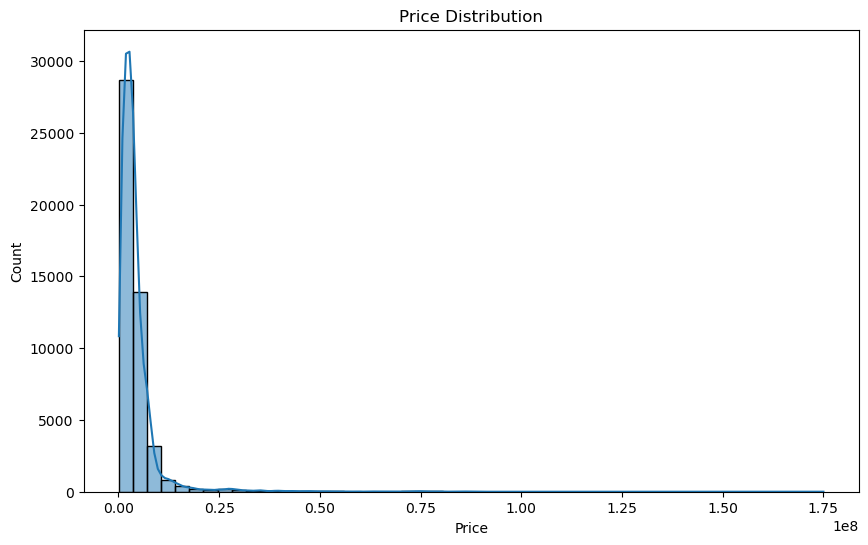

In [76]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


## Most Common Car Brands

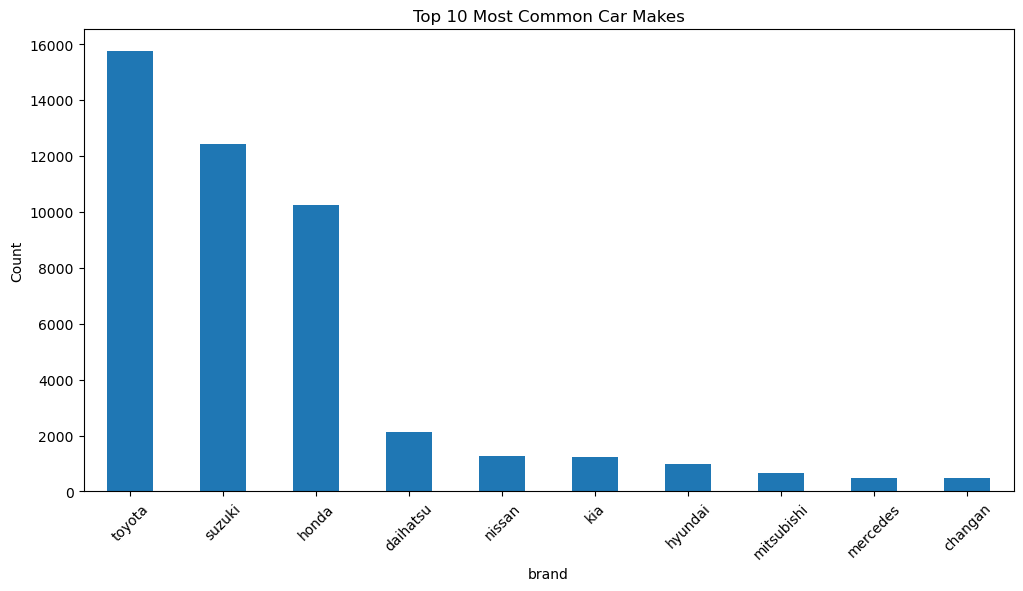

In [77]:
df['brand'] = df['title'].str.split().str[0]

plt.figure(figsize=(12, 6))
df['brand'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Most Common Car Makes')
plt.xlabel('brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Average Price per Car Make

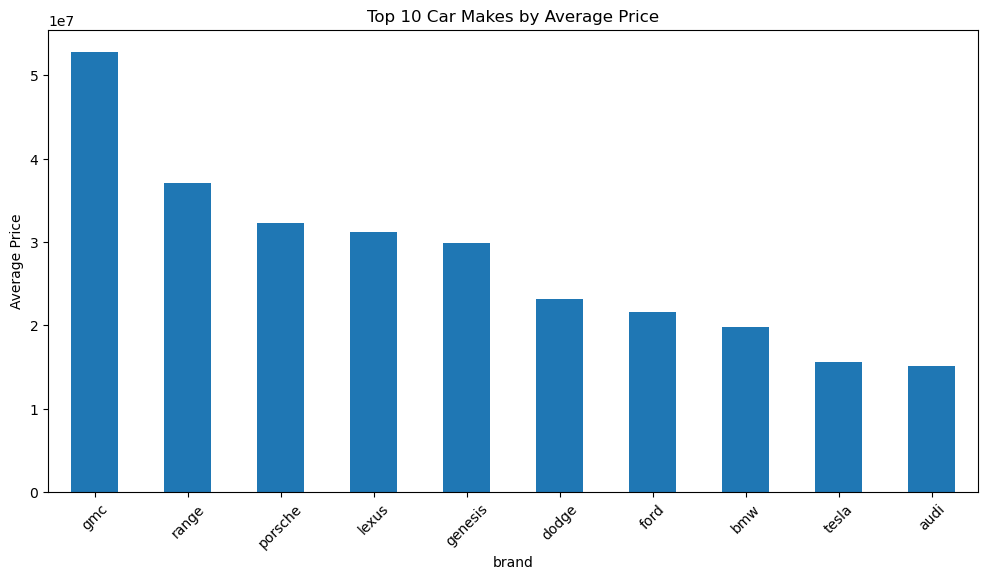

In [78]:
avg_price_by_make = df.groupby('brand')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
avg_price_by_make.plot(kind='bar')
plt.title('Top 10 Car Makes by Average Price')
plt.xlabel('brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

## Price Trends by Extracted Year

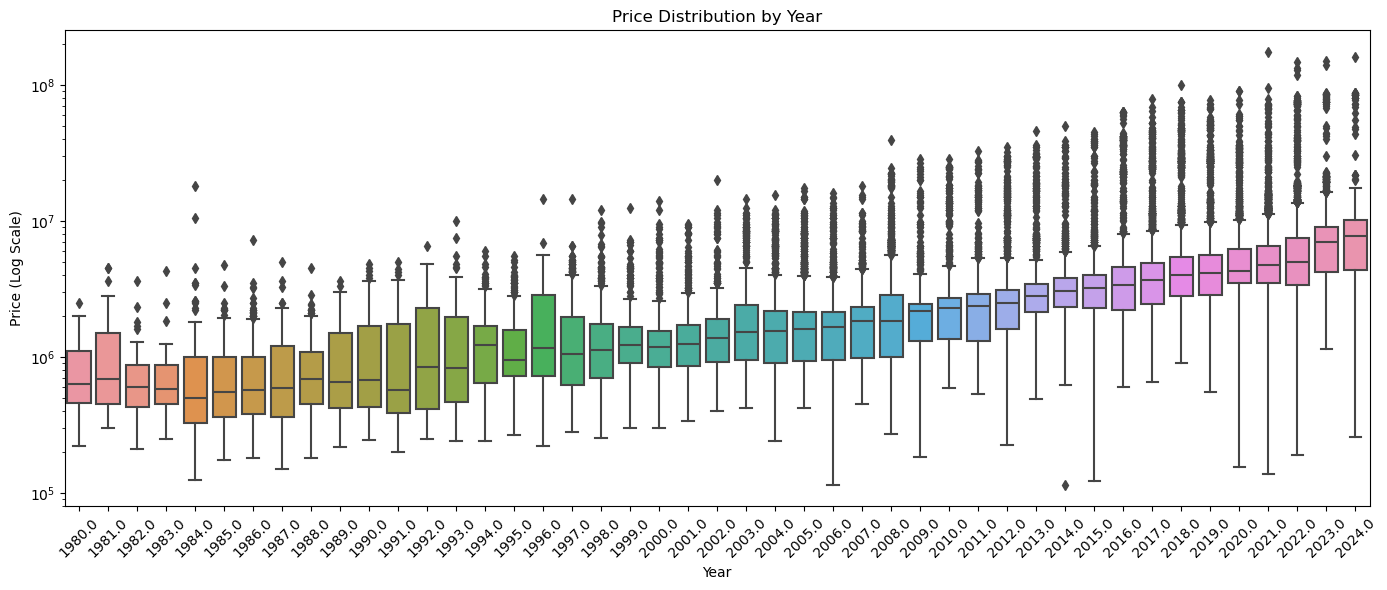

In [79]:
df = df[(df['extracted_year'] >= 1980) & (df['extracted_year'] <= 2025)]

plt.figure(figsize=(14, 6))
sns.boxplot(x='extracted_year', y='price', data=df)
plt.yscale('log')
plt.title('Price Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Price (Log Scale)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Correlation Matrix

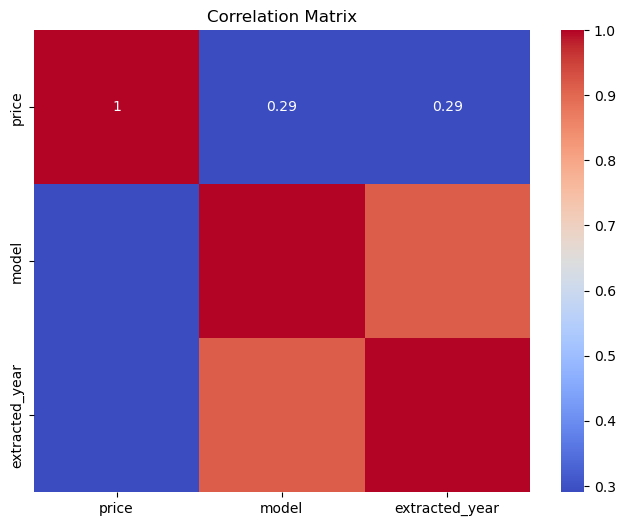

In [80]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['price', 'model', 'extracted_year']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Trend Over Time

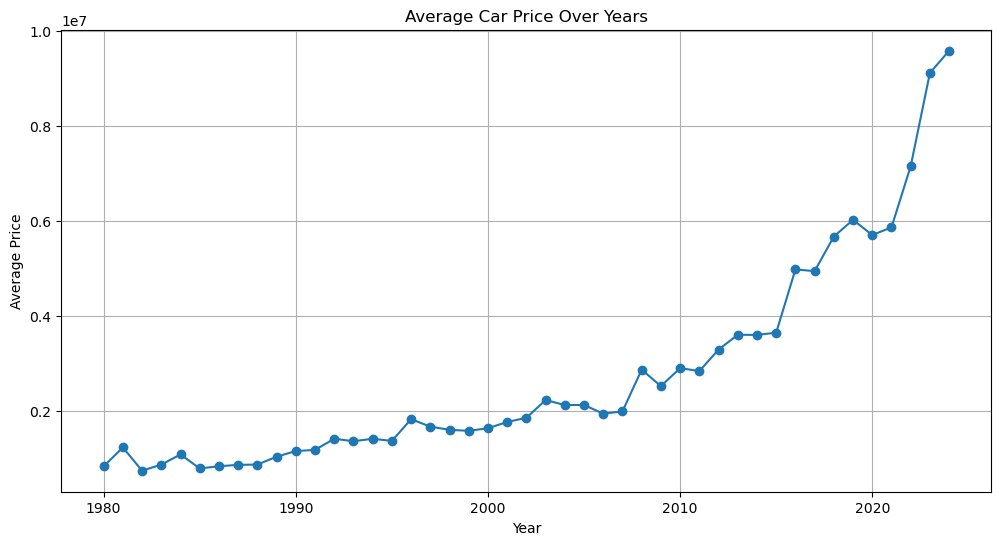

In [81]:
avg_price_by_year = df.groupby('extracted_year')['price'].mean()

plt.figure(figsize=(12, 6))
avg_price_by_year.plot(marker='o')
plt.title('Average Car Price Over Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

##  Most Listed (Highest Selling) Models

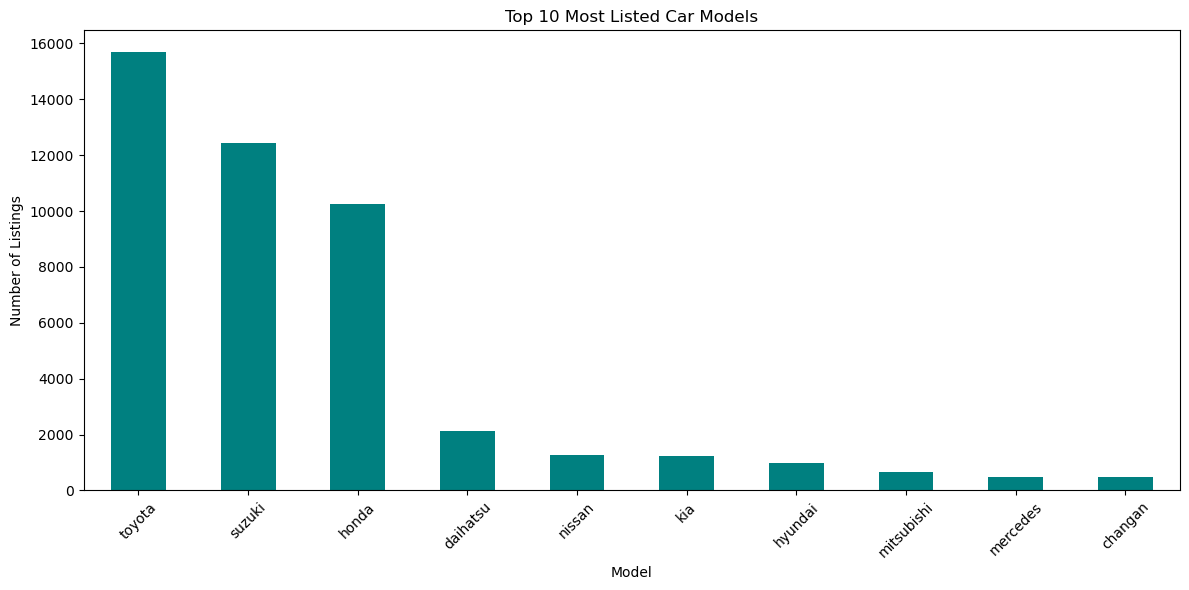

In [82]:
plt.figure(figsize=(12, 6))
df['brand'].value_counts().head(10).plot(kind='bar', color='teal')
plt.title('Top 10 Most Listed Car Models')
plt.xlabel('Model')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Most Listed Car Titles

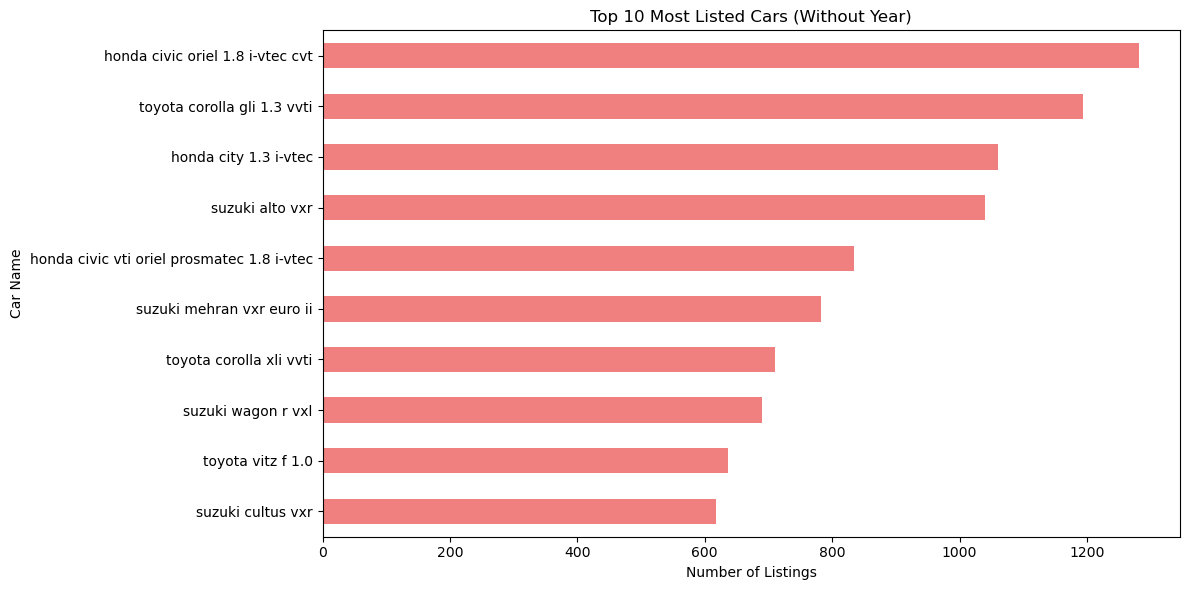

In [83]:
df['car_name'] = df['title'].str.replace(r'\b\d{4}\b', '', regex=True).str.strip()

plt.figure(figsize=(12, 6))
df['car_name'].value_counts().head(10).plot(kind='barh', color='lightcoral')
plt.title('Top 10 Most Listed Cars (Without Year)')
plt.xlabel('Number of Listings')
plt.ylabel('Car Name')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Most Listed Car according to Year

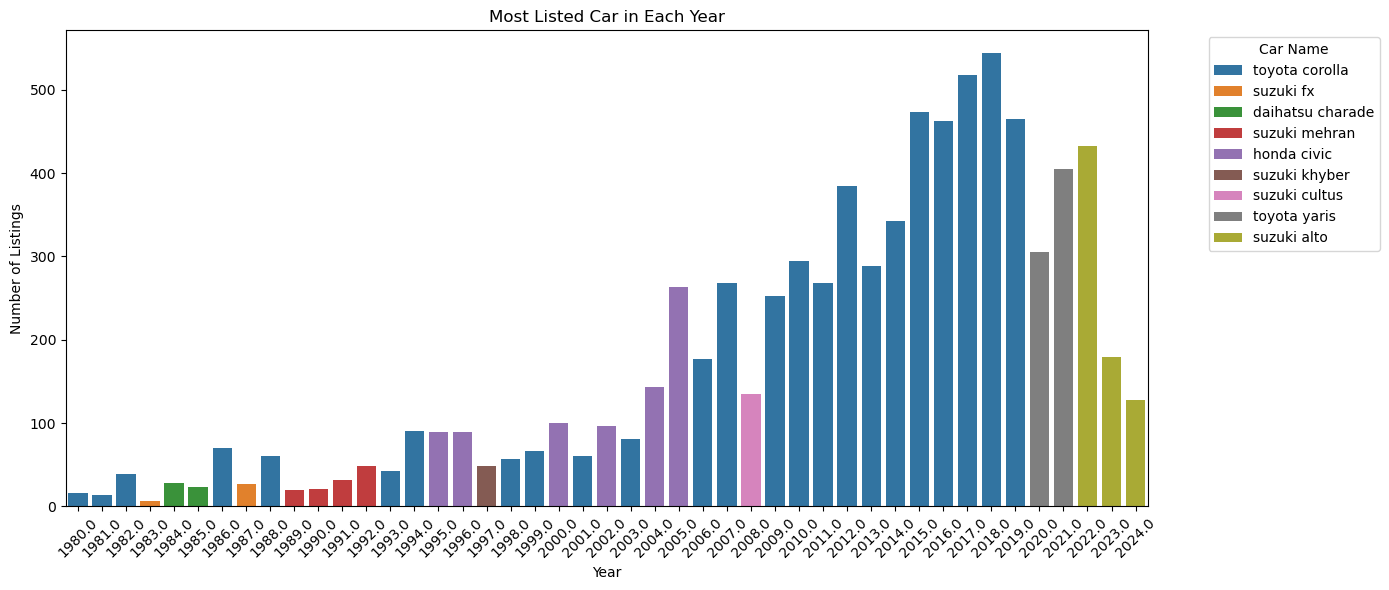

In [84]:
df[['brand_extracted', 'model_extracted']] = df['title'].str.extract(r'([a-zA-Z]+)\s+([a-zA-Z]+)')

df['car_name'] = df['brand_extracted'] + ' ' + df['model_extracted']


car_year_counts = df.groupby(['extracted_year', 'car_name']).size().reset_index(name='count')
most_listed_per_year = car_year_counts.sort_values(['extracted_year', 'count'], ascending=[True, False]).drop_duplicates('extracted_year')


plt.figure(figsize=(14, 6))
sns.barplot(data=most_listed_per_year, x='extracted_year', y='count', hue='car_name', dodge=False)
plt.title('Most Listed Car in Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.legend(title='Car Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

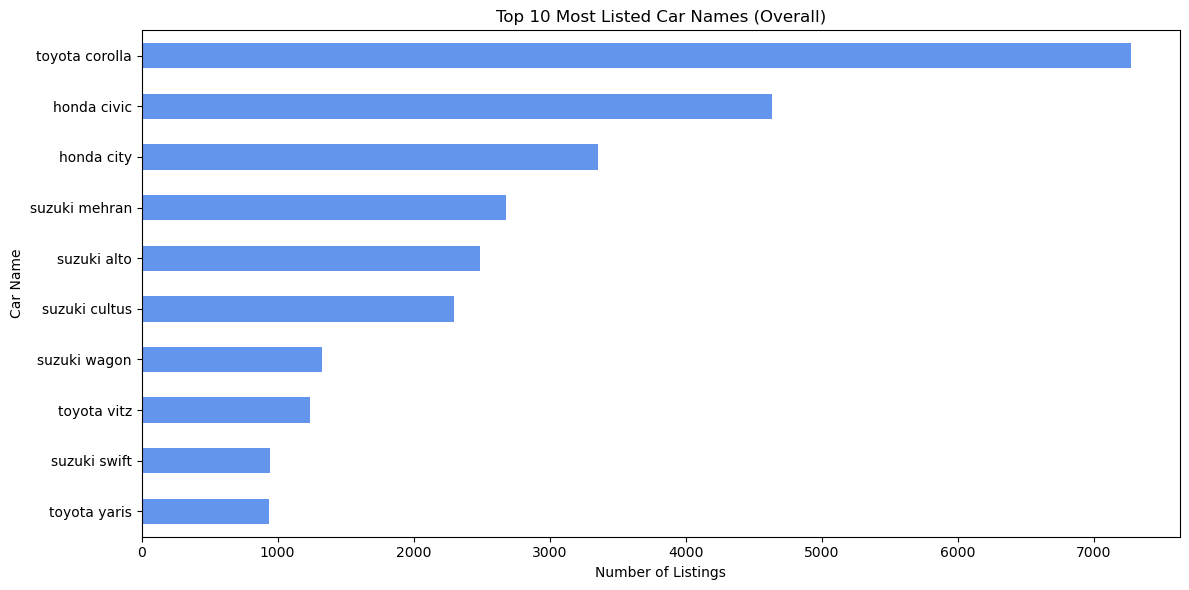

In [85]:
plt.figure(figsize=(12, 6))
df['car_name'].value_counts().head(10).plot(kind='barh', color='cornflowerblue')
plt.title('Top 10 Most Listed Car Names (Overall)')
plt.xlabel('Number of Listings')
plt.ylabel('Car Name')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


##  Top 10 Most Listed Models

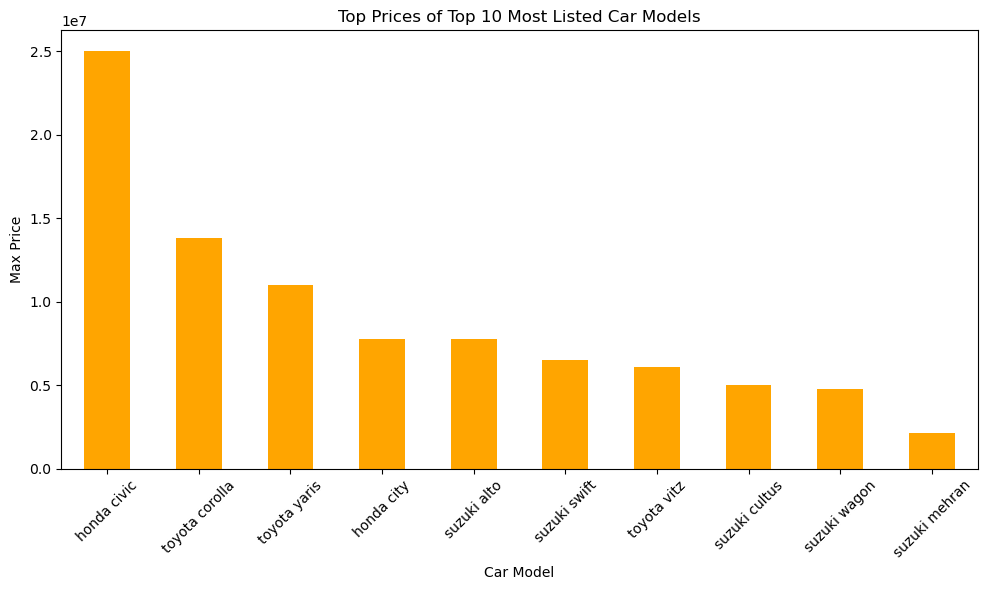

In [86]:
top_10_models = df['car_name'].value_counts().head(10).index
top_models_df = df[df['car_name'].isin(top_10_models)]
top_prices = top_models_df.groupby('car_name')['price'].max().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
top_prices.plot(kind='bar', color='orange')
plt.title('Top Prices of Top 10 Most Listed Car Models')
plt.xlabel('Car Model')
plt.ylabel('Max Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## older car models

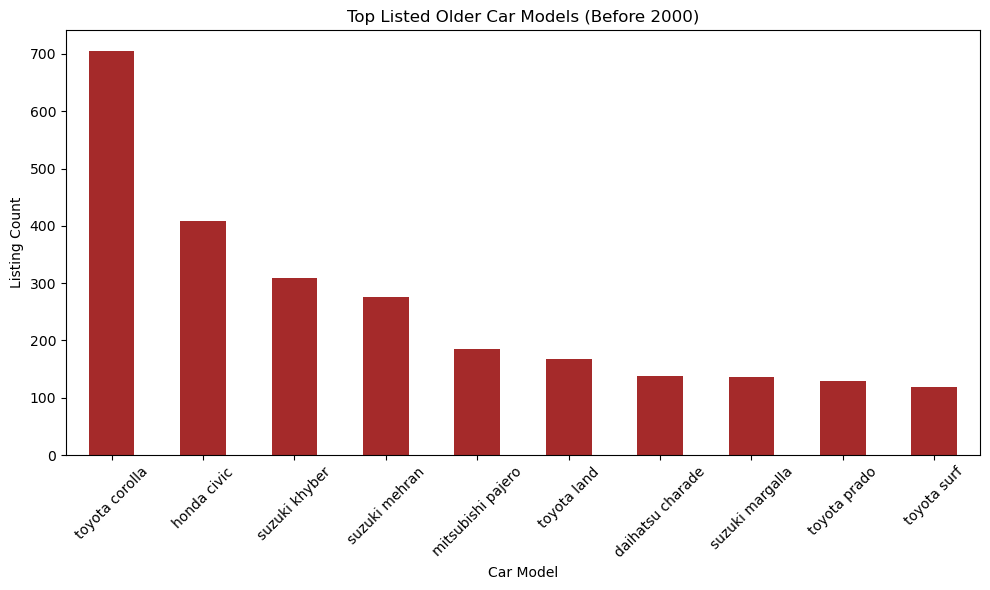

In [87]:
df_clean = df.dropna(subset=['extracted_year', 'car_name'])

older_models_df = df_clean[df_clean['extracted_year'] < 2000]

old_model_counts = older_models_df['car_name'].value_counts().head(10)


plt.figure(figsize=(10, 6))
old_model_counts.plot(kind='bar', color='brown')
plt.title('Top Listed Older Car Models (Before 2000)')
plt.xlabel('Car Model')
plt.ylabel('Listing Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Highest Mileage with Models

In [88]:
df.groupby('car_name')['mileage'].max().sort_values(ascending=False).head(10)


car_name
suzuki cultus       1000000
toyota corolla      1000000
honda city          1000000
kia spectra         1000000
suzuki alto         1000000
suzuki bolan        1000000
daihatsu cuore      1000000
daihatsu charade    1000000
suzuki khyber       1000000
suzuki mehran       1000000
Name: mileage, dtype: int64

## Top Listed Fuel Type

In [89]:
df['fuel_type'] = df['fuel_type'].replace('Not Available', 'Petrol')
df['fuel_type'].value_counts().head(10)


fuel_type
Petrol    42476
Hybrid     3696
Diesel     1829
Name: count, dtype: int64

## Top Listed Transmission

In [90]:
df['transmission'] = np.where(df['assembly'] == 'Local', 'Manual', 'Automatic')


df['transmission'].value_counts().head(10)


transmission
Manual       30426
Automatic    17575
Name: count, dtype: int64

## City Where Most Cars Were Listed


In [91]:
df['city'].value_counts().head(10)


city
Lahore        10734
Karachi        9144
Islamabad      7746
Rawalpindi     3073
Peshawar       2176
Faisalabad     1671
Multan         1322
Gujranwala     1202
Sialkot         898
Sargodha        549
Name: count, dtype: int64

## Most Listed Color

In [92]:
df['color'].value_counts().head(10)

color
White             12843
Silver             4965
Black              4411
Grey               2487
Solid White        2293
Taffeta White      1626
Blue               1560
Super White        1496
Graphite Grey       831
Attitude Black      823
Name: count, dtype: int64

## Imported vs Local

In [93]:
df['assembly'].value_counts() 


assembly
Local       30426
Imported    17575
Name: count, dtype: int64

## Top Engine Capacity

In [94]:
df['engine_capacity'].value_counts().head(10)


engine_capacity
1300    8296
1000    7536
1500    6225
660     5569
1800    5518
800     3289
1600    2464
2000    1738
2700     820
796      791
Name: count, dtype: int64

In [95]:
output_filename = 'cleaned_pakwheels_automobile_data.csv'


df.to_csv(output_filename, index=False)

print(f"Cleaned data saved to {output_filename}")

Cleaned data saved to cleaned_pakwheels_automobile_data.csv
